# Automated Data Collection Tool
**Authors:** Unaisa Islam, Dickson Owuor, Daisy Kipto, Raymond Cao

July 2025

## Main Goal

To write a function that will take as input: (1) a CSV file with image filters and (2) microscopy images. The function will apply filters to the images to produce graph images. The images will be later labeled as good/bad in order to be used to train a CNN model to detect/predict good and bad graph images.

### 1. Import Libraries

In [18]:
# Installing Libraries (if not installed)
#!pip3 install matplotlib
#!pip3 install sgtlib
#!pip3 install seaborn
#!pip3 install numpy
#!pip3 install pandas

In [19]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

from sgtlib import modules as sgt

### 2. Get CSV file and Image Folder

In [20]:
# Read CSV file into a Pandas DataFram

filter_df = pd.read_csv('filters.csv')
filter_df.head()

,file_name,Adaptive Kernel,Global Threshold,OTSU,Dark FG,Autolevel,Gaussian Kernel,Laplacian,Sobel,Median,Scharr,Lowpass Window,Gamma,result
0,ANF copy.jpeg,21.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,3.0,0.94,G
1,ANF copy.jpeg,23.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,4.0,0.94,G
2,ANF copy.jpeg,25.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,3.0,0.97,G
3,ANF copy.jpeg,23.0,NaN,NaN,NaN,7.0,7.0,NaN,NaN,True,NaN,3.0,0.93,G
4,ANF copy.jpeg,11.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,True,NaN,2.0,0.85,B


In [21]:
# Load images folder
data_dir = 'images'
os.listdir(data_dir)
print(os.listdir(data_dir))

['Sample3 SE_InL_002 - Small.tif', 'b-loofah', 'e-eggplant', 'Sample6 BSE_010 - Small.tif', 'i-squid', 'rGO.jpeg', '.DS_Store', 'Sample3 BSE_017.tif', 'Sample6 SE_InL_002 - Small.tif', 'CANF.jpeg', 'sgt_files', 'CCF.jpeg', 'Sample3 BSE_018 - Small.tif', 'FCF.jpeg', 'd-mushroom', 'f-jujube', 'h-sea cucumber', 'Sample3 SE_InL_003 - Small.tif', 'c-pomelo peel', 'Sample6 SE_InL_007.tif', 'a-sunflower receptacle', 'Sample6 SE_InL_006.tif', 'j-nude mouse lung', 'Sample3 BSE_017 - Small.tif', 'ANF.jpeg', 'Sample6 SE_InL_003 - Small.tif', 'CANN.jpeg', 'g-sponge', 'Sample6 SE_InL_002.tif']


(664, 912, 3)


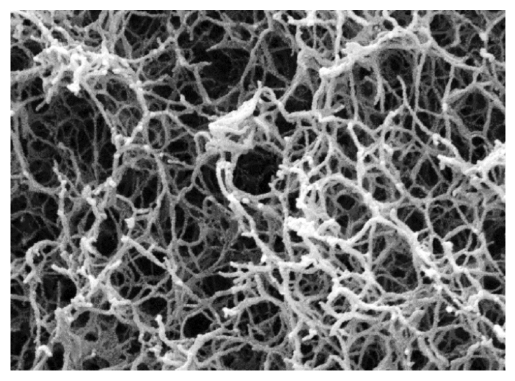

In [22]:
# Check out images

img = mpimg.imread('images/ANF.jpeg')
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

### 3. Run StructuralGT

* Identify and set paths to image(s) and config file

In [23]:
# set paths
img_path = "images/ANF.jpeg"
cfg_file = "sgt_configs.ini"   # Optional: leave blank

* Define a function that will allow you to receive live updates from StructuralGT (as it is running)

In [24]:
# Define a function for receiving progress updates
def print_updates(progress_val, progress_msg):
    print(f"{progress_val}: {progress_msg}")

* Create an object that will take as input the config file and image and apply image filter

In [25]:
# Create a Network object
ntwk_obj, _ = sgt.ImageProcessor.create_imp_object(img_path)

* Update image filter options

In [26]:
sel_img_batch = ntwk_obj.get_selected_batch()
img_obj = sel_img_batch.images[0]
print(f"Old Threshold Type: {img_obj.configs["threshold_type"]["value"]}")

img_obj.configs["threshold_type"]["value"] = 1
print(f"New Threshold Type: {img_obj.configs["threshold_type"]["value"]}")

Old Threshold Type: 0
New Threshold Type: 1


* Apply image filters according to config file

In [27]:
# Apply image filters according to cfg_file
ntwk_obj.add_listener(print_updates)
ntwk_obj.apply_img_filters()
ntwk_obj.remove_listener(print_updates)

10: Processing image...
99.0: Image processing in progress...
100: Image processing complete...


In [28]:
# Get images
sel_img_batch = ntwk_obj.get_selected_batch()
bin_images = [obj.img_bin for obj in sel_img_batch.images]
mod_images = [obj.img_mod for obj in sel_img_batch.images]

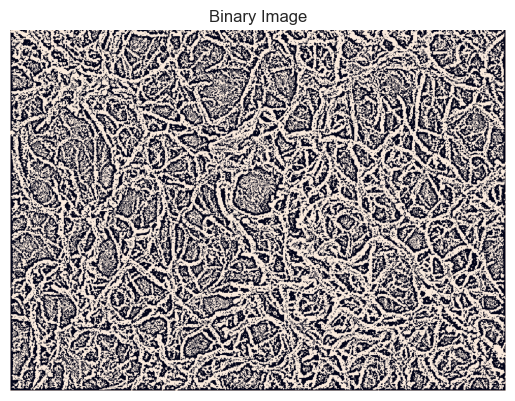

In [29]:
# View images
plt.imshow(bin_images[0])
plt.axis('off')  # Optional: Turn off axis ticks and labels for a cleaner image display
plt.title('Binary Image')
plt.show()

* Extract the graph

In [30]:
# Extract graph
ntwk_obj.add_listener(print_updates)
ntwk_obj.build_graph_network()
ntwk_obj.remove_listener(print_updates)

0: Starting graph extraction...
50: Extracting the graph network...
51: Build graph skeleton from binary image...
52: Ran merge_nodes for image skeleton...
54: Ran remove_small_objects for image skeleton...
56: Ran prune_dangling_edges for image skeleton...
60: Creating graph network...
64: Removing self loops from graph network...
66: Assigning weights to graph network...
75: Verifying graph network...
77: Retrieving graph properties...
78: Identifying graph subcomponents...
80: Storing graph properties...
90: Saving graph network...
95: Plotting graph network...


* View the graph image

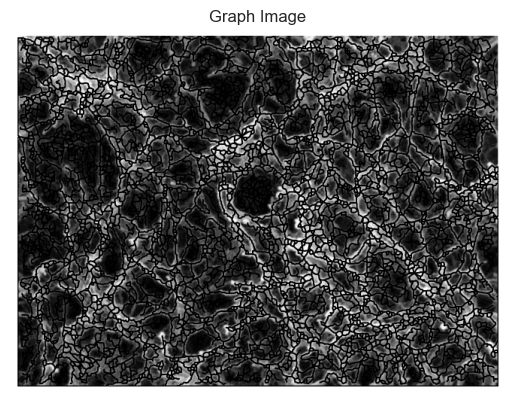

In [31]:
# View graph
net_images = [sel_img_batch.graph_obj.img_ntwk]
plt.imshow(net_images[0])
plt.axis('off')  # Optional: Turn off axis ticks and labels for a cleaner image display
plt.title('Graph Image')
plt.show()

In [32]:
def automated_graph_generator():
    """"""
    # identify an image folder
    # Run 1, 2, 3 in a loop (if we want 10k, then the loop should repeat itself 10k times)
    # 1. randomly come with image filters
    # 2. apply them to all images
    # 3. save the graph images (with unique names) and the randomly selected filters (used to generate that graph - in CVS file with the file name of the graph image)
    pass


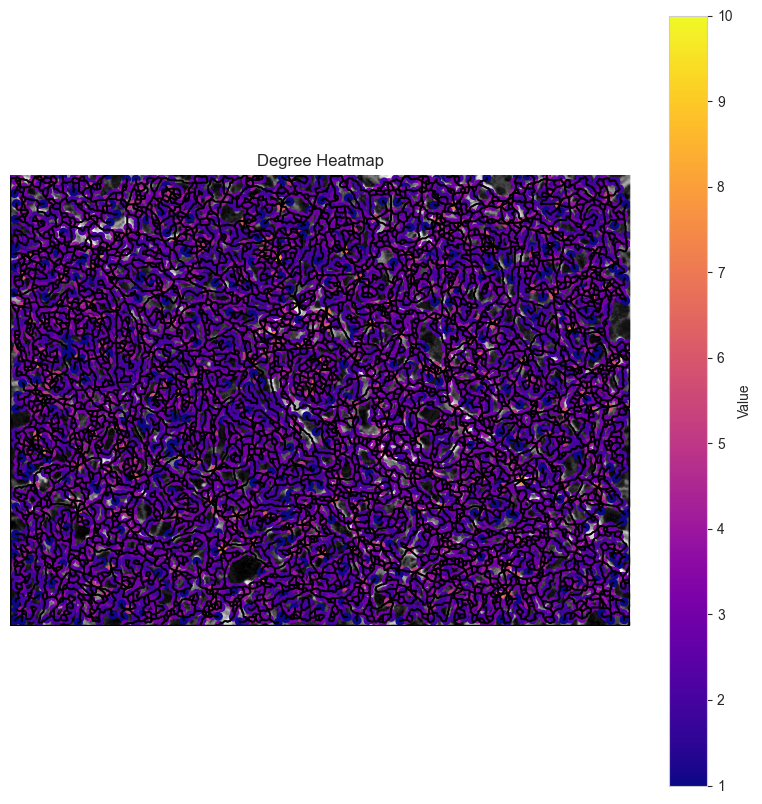

In [35]:
# Degree Heatmap
# Assignment Betweenness Centrality
import networkx as nx

# Compute Degree Distribution
graph = sel_img_batch.graph_obj.nx_graph
deg_distribution_1 = dict(nx.degree(graph))
deg_distribution = np.array(list(deg_distribution_1.values()), dtype=float)
avg_deg = round(np.average(deg_distribution), 5)

# Create plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis('off')
ax.set_title('Degree Heatmap')

# Add image to plot
ax.imshow(img, cmap='gray')

# Add edges to plot
for (s, e) in graph.edges():
    ge = graph[s][e]['pts']
    ax.plot(ge[:, 1], ge[:, 0], 'black', linewidth=1.5)

# Add nodes to plot
nodes = graph.nodes()
gn = np.array([nodes[i]['o'] for i in nodes])
sc = ax.scatter(gn[:, 1], gn[:, 0], s=30, c=deg_distribution, cmap='plasma')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Value')
plt.show()